In [ ]:
pip install pycaret


In [ ]:
#connect to google drive
from google.colab import drive
drive.mount("/content/gdrive")
sys_path=("/content/gdrive/MyDrive/Colab Notebooks/RTAdataset.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#call dataset from drive
import pandas as pd
df =pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/RTADataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df=df.dropna()

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'Owner_of_vehicle')

,Description,Value
0,Session id,1167
1,Target,Owner_of_vehicle
2,Target type,Multiclass
3,Target mapping,"Governmental: 0, Organization: 1, Other: 2, Owner: 3"
4,Original data shape,"(2889, 32)"
5,Transformed data shape,"(2889, 201)"
6,Transformed train set shape,"(2022, 201)"
7,Transformed test set shape,"(867, 201)"
8,Numeric features,2
9,Categorical features,29


In [ ]:
print(df.shape)

(2889, 32)


In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'Owner_of_vehicle')

,Description,Value
0,Session id,7329
1,Target,Owner_of_vehicle
2,Target type,Multiclass
3,Target mapping,"Governmental: 0, Organization: 1, Other: 2, Owner: 3"
4,Original data shape,"(2889, 32)"
5,Transformed data shape,"(2889, 201)"
6,Transformed train set shape,"(2022, 201)"
7,Transformed test set shape,"(867, 201)"
8,Numeric features,2
9,Categorical features,29


In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9016,0.4183,0.9016,0.8794,0.8673,0.2016,0.2974,1.8340
rf,Random Forest Classifier,0.8922,0.3793,0.8922,0.8198,0.8471,0.0616,0.0950,1.6790
dummy,Dummy Classifier,0.8907,0.2500,0.8907,0.7934,0.8392,0.0000,0.0000,0.7320
knn,K Neighbors Classifier,0.8882,0.3091,0.8882,0.8185,0.8432,0.0399,0.0725,1.4650
ridge,Ridge Classifier,0.8863,0.0000,0.8863,0.8381,0.8543,0.1447,0.1827,1.1080
lr,Logistic Regression,0.8853,0.3854,0.8853,0.8501,0.8596,0.1908,0.2197,3.3530
xgboost,Extreme Gradient Boosting,0.8764,0.3656,0.8764,0.8393,0.8536,0.1745,0.1913,6.4010
svm,SVM - Linear Kernel,0.8754,0.0000,0.8754,0.8449,0.8558,0.1955,0.2121,0.8240
gbc,Gradient Boosting Classifier,0.8729,0.3583,0.8729,0.8339,0.8498,0.1592,0.1708,5.2010
lda,Linear Discriminant Analysis,0.8591,0.3723,0.8591,0.8586,0.8568,0.2734,0.2767,1.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
et_classifier=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9163,0.8316,0.9163,0.9100,0.8951,0.3878,0.4602
1,0.9015,0.8029,0.9015,0.9064,0.8660,0.2149,0.3470
2,0.8911,0.0000,0.8911,0.8407,0.8551,0.1286,0.1830
3,0.8960,0.0000,0.8960,0.8772,0.8513,0.0794,0.2027
4,0.9010,0.0000,0.9010,0.8881,0.8691,0.2094,0.2979
5,0.9010,0.0000,0.9010,0.8650,0.8677,0.2078,0.2957
6,0.9059,0.0000,0.9059,0.9149,0.8725,0.2240,0.3554
7,0.9109,0.8683,0.9109,0.8893,0.8803,0.2871,0.4082
8,0.9010,0.8430,0.9010,0.8650,0.8677,0.2078,0.2955


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

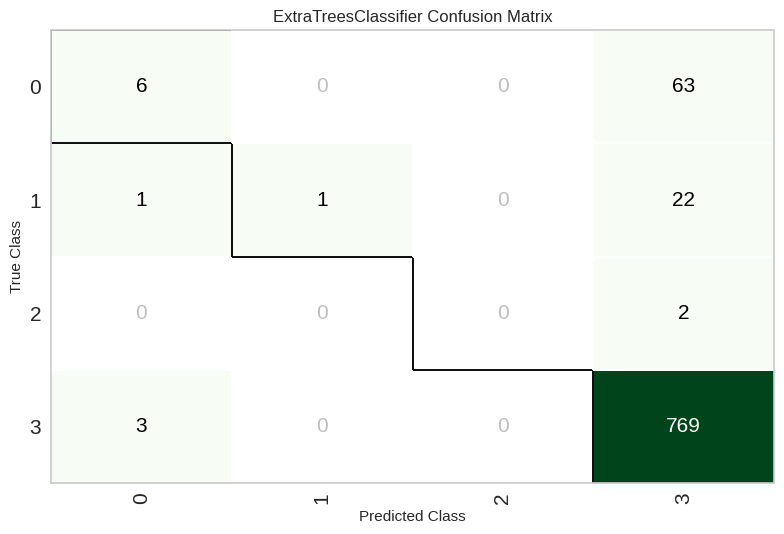

In [ ]:
# plot confusion matrix
plot_model(best, plot='confusion_matrix')

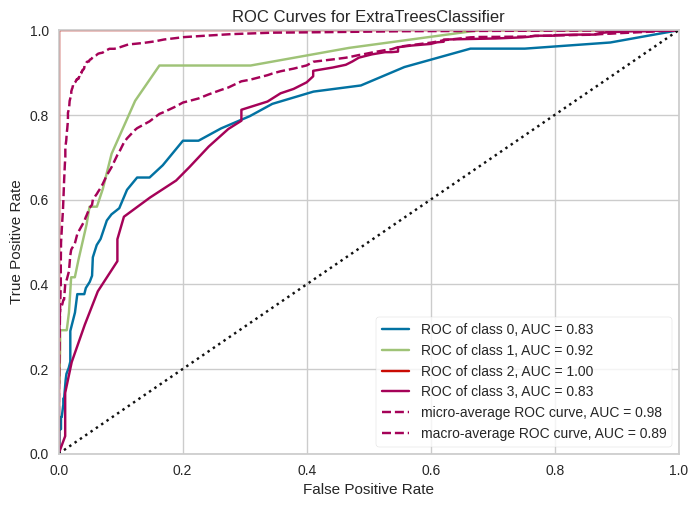

In [ ]:
# plot AUC
plot_model(best, plot='auc')

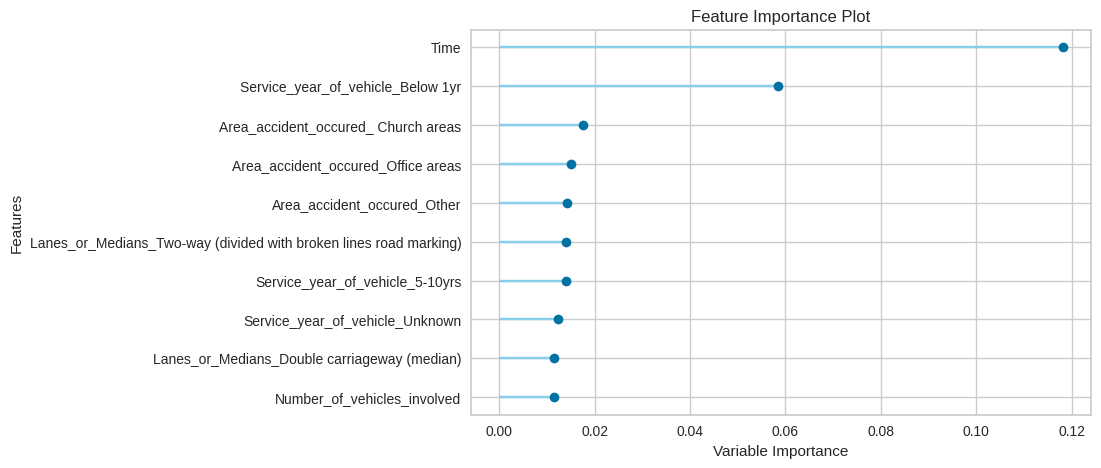

In [ ]:
# plot feature importance
plot_model(best, plot='feature')

In [ ]:
# predict on test set
holdout_pred=predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8950,0.8338,0.8950,0.8754,0.8555,0.1248,0.2112


In [ ]:
# show predictions df
holdout_pred.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Owner_of_vehicle,prediction_label,prediction_score
9122,17:22:00,Saturday,Over 51,Male,Above high school,Employee,2-5yr,Taxi,5-10yrs,No defect,...,31-50,2,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Serious Injury,3,Owner,0.88
9729,12:33:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Automobile,5-10yrs,No defect,...,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,1,Owner,0.63
6142,17:53:00,Wednesday,Under 18,Male,Elementary school,Employee,5-10yr,Automobile,1-2yr,No defect,...,18-30,3,Driver,Normal,Unknown or other,No priority to vehicle,Slight Injury,3,Owner,0.92
4730,19:39:00,Thursday,Under 18,Male,Junior high school,Owner,1-2yr,Automobile,1-2yr,No defect,...,18-30,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Fatal injury,3,Owner,0.90
1891,15:15:00,Saturday,Unknown,Male,Writing & reading,Employee,5-10yr,Lorry (41?100Q),Unknown,No defect,...,18-30,3,Other,Normal,Not a Pedestrian,No distancing,Slight Injury,3,Owner,0.90


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number_of_vehicles_involved',
                                              'Number_of_casualties'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               kee...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feature

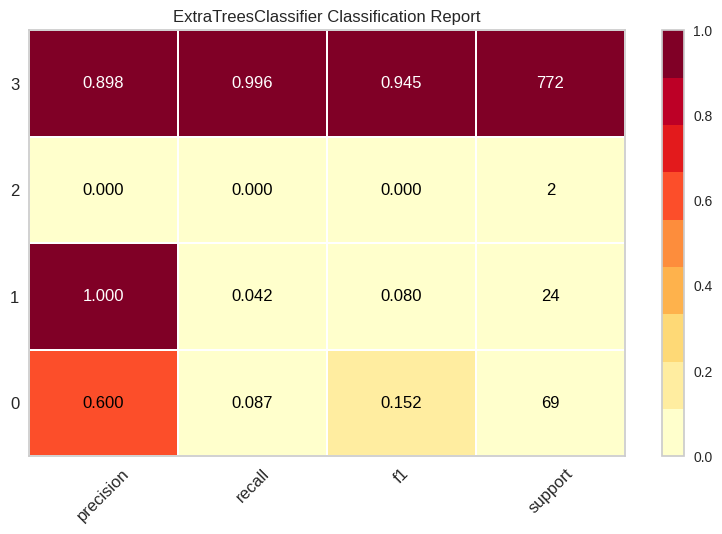

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

In [ ]:
#saving the model
save_model(et_classifier,"ET CLASSIFIER")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number_of_vehicles_involved',
                                              'Number_of_casualties'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               kee...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feature

In [ ]:
pip install gradio


In [ ]:
pip install pycaret[mlops]

In [ ]:
create_app(et_classifier)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>